In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#setup CIFAR10
transform = transforms.Compose([transforms.ToTensor()]) 
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)


Files already downloaded and verified


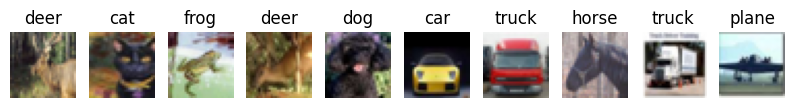

In [2]:
# CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


#get first batch
for images, labels in trainloader:
    break 

#plot images
plt.figure(figsize=(10, 2))
for i in range(10): #display 10 images
    plt.subplot(1, 10, i + 1)
    npimg = images[i].numpy()
    #needs to be transposed for matplotlib expected format
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #class label as title instead of int
    plt.title(f'{classes[labels[i].item()]}')
    plt.axis('off')
plt.show()

In [3]:
activation_matrix = np.load("cnn_activation_matrix.npy")
print(activation_matrix.shape)
print(f"Example row at index 0: {activation_matrix[0]}")

(16586, 500)
Example row at index 0: [ 0.06643996  0.19115059 -0.12322941 -0.42504203  0.12102689 -0.6920792
 -0.5011994   0.32156312  0.0405937  -0.12727025 -0.6648311  -0.50348073
 -0.5012184   0.04268894 -0.02690797 -0.07196178 -0.6912164  -0.1569894
 -0.68633413 -0.6822975   0.3116904  -0.4358852   0.03177249 -0.33229762
 -0.07112221 -0.11785474 -0.014136    0.07865782 -0.207602    0.23540656
  0.27666187 -0.18443933  0.0366835  -0.68633413  0.05409297  0.02123985
 -0.4243015  -0.6041722  -0.11168912  0.15621297  0.20900501 -0.25501913
 -0.18632764 -0.58747834  0.18682699  0.2633683   0.08961296 -0.14934252
 -0.00185454 -0.15745856  0.19068171  0.3784467   0.00248623 -0.33343047
  0.21094324 -0.21668147 -0.51467055 -0.38722208 -0.5179343  -0.385444
 -0.2798382   0.2242306   0.17725895  0.1674247   0.01606788 -0.67971903
  0.13032468  0.18919466 -0.14008497 -0.6203567  -0.14483093 -0.6787212
 -0.67666477  0.19205768  0.17847364 -0.5277604  -0.09522657 -0.03419642
 -0.21057108  0.302

In [4]:
embeddings = np.load("neuron_node2vec_embeddings.npy")
print(embeddings.shape)
print(f"Example row at index 0: {embeddings[0]}")

(16586, 16)
Example row at index 0: [ 0.67477447 -0.47014874 -0.16637097  0.373493   -0.10083736  0.2964186
 -1.0922847   0.60569066 -1.1900451  -1.080069   -1.4965233  -0.7027686
 -0.27546042 -0.19468917 -1.6078956  -0.5105024 ]


In [5]:
from sklearn.cluster import KMeans


#10 clusters is optimal
n_clusters = 10
#kmeans on activation values
kmeans_activations = KMeans(n_clusters=n_clusters, random_state=42)
activation_labels = kmeans_activations.fit_predict(activation_matrix)



c:\Users\jesse\Documents\writeitProjRepo\write-it\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
#kmeans on embeddings
kmeans_node2vec = KMeans(n_clusters=n_clusters, random_state=42)
node2vec_labels = kmeans_node2vec.fit_predict(embeddings)




c:\Users\jesse\Documents\writeitProjRepo\write-it\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score


#showing metrics ARI, and silhoutte score for each
ari = adjusted_rand_score(activation_labels, node2vec_labels)
print(f"ARI: {ari:.4f}")

silhouette_activations = silhouette_score(activation_matrix, activation_labels)
print(f"Silhouette Score for activation values: {silhouette_activations:.4f}")

silhouette_node2vec = silhouette_score(embeddings, node2vec_labels)
print(f"Silhouette Score for embeddings: {silhouette_node2vec:.4f}")



ARI: 0.3851
Silhouette Score for activation values: 0.0790
Silhouette Score for embeddings: 0.2155


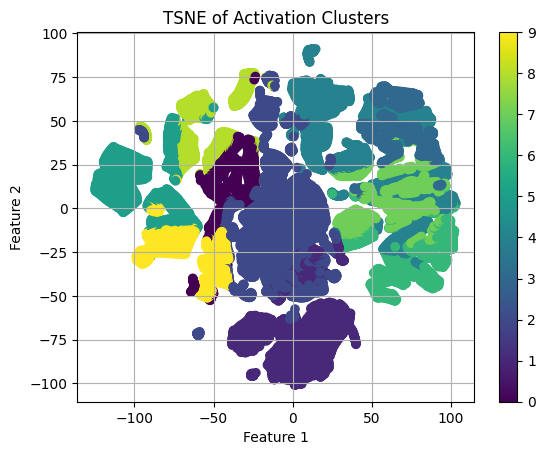

In [8]:
from sklearn.manifold import TSNE

#class labels
labels = np.load("activation_cluster_labels.npy")

#apply TSNE
tsne_activation = TSNE(n_components=2, random_state=42).fit_transform(activation_matrix)

#visualize TNSE
scatter = plt.scatter(tsne_activation[:, 0], tsne_activation[:, 1], c=labels)
plt.colorbar(scatter)
plt.title("TSNE of Activation Clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


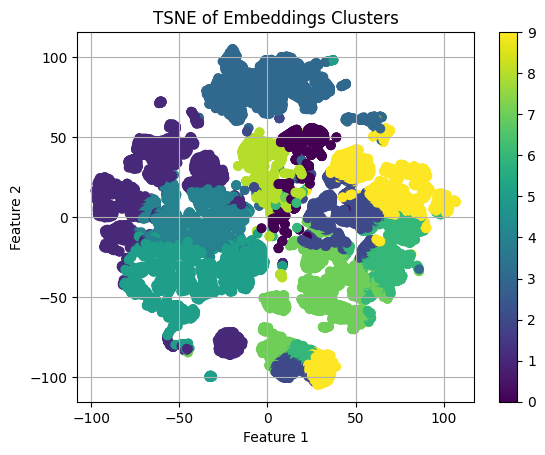

In [9]:
#class labels
labels = np.load("node2vec_cluster_labels.npy")

#apply TSNE
tsne_embeddings = TSNE(n_components=2, random_state=42).fit_transform(embeddings)

#visualize TNSE
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels)
plt.colorbar(scatter)
plt.title("TSNE of Embeddings Clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()